In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
df = pd.DataFrame(data['data'],columns=['SL','SW','PL','PW'])

In [58]:
df['target'] = pd.DataFrame(data['target'])
df['target_names'] = df['target'].apply(lambda x:data['target_names'][x])

In [59]:
df.head()

,SL,SW,PL,PW,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
SL              150 non-null float64
SW              150 non-null float64
PL              150 non-null float64
PW              150 non-null float64
target          150 non-null int32
target_names    150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


In [57]:
df.describe()

,SL,SW,PL,PW,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


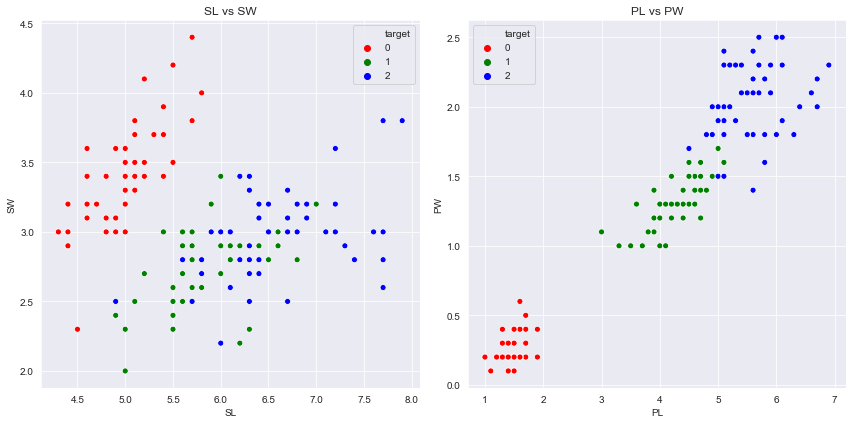

In [53]:
sns.set_style('darkgrid')
plt.figure('Iris Dataset',figsize=(12,6))

plt.subplot(121)
plt.title('SL vs SW')
sns.scatterplot(df['SL'],df['SW'],hue=df['target'],palette=['red','green','blue'])

plt.subplot(122)
plt.title('PL vs PW')
sns.scatterplot(df['PL'],df['PW'],hue=df['target'],palette=['red','green','blue'])

plt.tight_layout()
plt.show()

C:\Users\rudya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rudya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


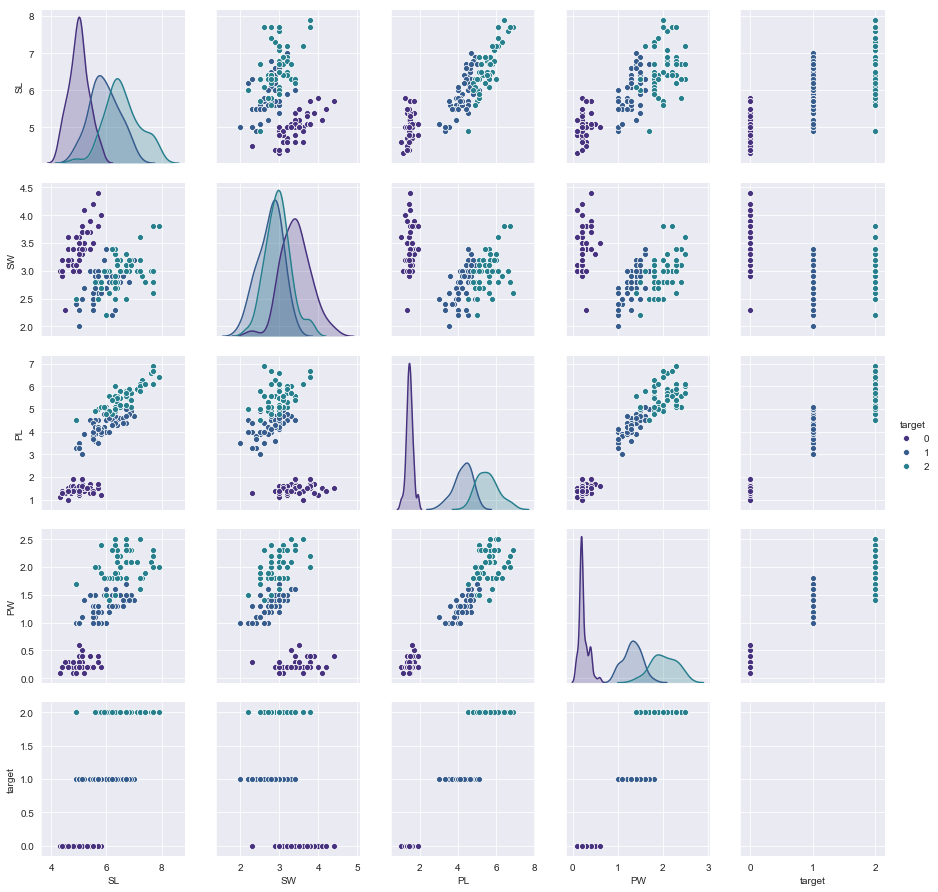

In [56]:
sns.pairplot(df,hue='target')

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop(['target','target_names'],axis=1)
y = df['target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [63]:
from sklearn.svm import SVC

In [64]:
model_svc = SVC(gamma='auto')

In [65]:
model_svc = model_svc.fit(X_train,y_train)
model_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
prediction = model_svc.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.94        15
           2       1.00      0.86      0.92        14

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [69]:
print(confusion_matrix(y_test,prediction))

[[16  0  0]
 [ 0 15  0]
 [ 0  2 12]]


## Using GridSearchCV to find best parameter ##

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [73]:
grid = GridSearchCV(model_svc,parameter,verbose=3,cv=3)

In [74]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8571428571428571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.9142857142857143, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.3333333333333333, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..... C=1, gamma=0.0001, score=0.34285714285714286, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6764705882352942, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.9444444444444444, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.9428571428571428, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........ C=10, gamma=0.1, score=0.9722222222222222, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [75]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [76]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
grid_prediction = grid.predict(X_test)

In [78]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [79]:
print(confusion_matrix(y_test,grid_prediction))

[[16  0  0]
 [ 0 14  1]
 [ 0  0 14]]
